In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Submission results

In [66]:
results = {'Zindi benchmark': 0.0387, 
           'Randomized': 0.0228,
           'Zindi top score': 0.0752,
           
           #OUR RESULTS
           'Baseline': 0.0278,
           
           #Using baseline model
           'HOG images as 4th channel (baseline)': 0.0346,
           'Clustered images (baseline)': 0.0202,
           'Canny edge detection (baseline)': 0.0247,
                      
           #Three models using location
           'Three models for location': 0.0280,
           
           #Structured pipeline
           'Structured train/val split': 0.0416,
           'Blur-Noise (structured)': 0.0396,
           'Canny edge detection (structured)': 0.0304,
           
           #Structured pipeline and concatenation
           'Images + location (structured)': 0.0357,
           'Images + location + HOG (structured)': 0.0265,
           'Images + location + HOG + Canny (structured)': 0.0178,
          }


Text(0.5, 1.0, 'Results')

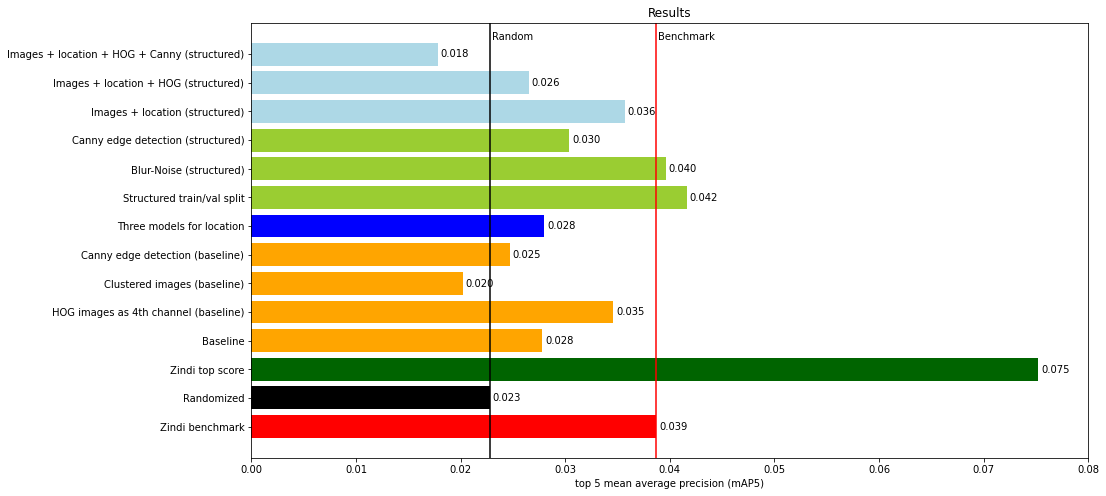

In [102]:
color = ['red','black', 'darkgreen', #Comparison Scores
         'orange', 'orange', 'orange', 'orange', #Baseline
         'blue', #Three models for location
         'yellowgreen', 'yellowgreen', 'yellowgreen', #Structured data
         'lightblue', 'lightblue', 'lightblue'] #Concat Models
plt.figure(figsize=(15,8))
hbars = plt.barh(range(len(results)), list(results.values()), align='center', color=color)
plt.yticks(range(len(results)), list(results.keys()))
plt.axvline(x=results['Zindi benchmark'], color='red')
plt.axvline(x=results['Randomized'], color='black')
plt.bar_label(hbars, fmt='%.3f', padding=3)
plt.text(results['Zindi benchmark']+0.0002, 13.5, 'Benchmark')
plt.text(results['Randomized']+0.0002, 13.5, 'Random')
plt.xlim(right=0.08)
plt.xlabel('top 5 mean average precision (mAP5)')
plt.title('Results')
#plt.show()
#plt.savefig('results_barplot', bbox_inches='tight')

In [70]:
results['Zindi benchmark']

0.0387

## EDA submission files (turtle ids)

In [ ]:
df = pd.read_csv('../data/submission.csv')
train = pd.read_csv('../data/train_corrected.csv')

In [ ]:
df

In [ ]:
df.nunique()

In [ ]:
p1=df['prediction1'].value_counts()

In [ ]:
p2=df['prediction2'].value_counts()

In [ ]:
p3=df['prediction3'].value_counts()

In [ ]:
p4=df['prediction4'].value_counts()

In [ ]:
p5=df['prediction5'].value_counts()

In [ ]:
p_full = pd.concat([p1, p2, p3, p4, p5], axis=0)

In [ ]:
p_full.nunique()

In [ ]:
df = p_full.reset_index()
df = df.rename(columns={'index': 'turtle_id', 0: 'count'})
df

In [ ]:
df['turtle_id'].nunique()

In [ ]:
df.groupby('turtle_id').sum().sort_values(by='count')

In [ ]:
train['turtle_id'].value_counts()

In [ ]:
df_id = df.groupby('turtle_id').sum().sort_values(by='turtle_id').reset_index()
train_id = pd.DataFrame(train['turtle_id'].value_counts()).reset_index()
train_id = train_id.rename(columns={'index': 'turtle_id', 'turtle_id': 'count'}).sort_values(by='turtle_id')

In [ ]:
df_id

In [ ]:
train_id

In [ ]:
#pred_train = pd.concat([df_id, train_id], axis=1)
pred_train = df_id.merge(train_id, on='turtle_id', how='outer', suffixes=('_pred', '_train'))
pred_train

In [ ]:
pred_train.sort_values(by='count_pred', ascending=False).head(20)

In [ ]:
pred_train.sort_values(by='count_pred', ascending=False).tail(20)

In [ ]:
pred_train.sort_values(by='count_train', ascending=False).head(20)

In [ ]:
pred_train.sort_values(by='count_train', ascending=False).tail(20)